In [ ]:
pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.0 MB/s eta 0:00:00


In [ ]:
# 코렙에서 한글 깨짐

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# import koreanize_matplotlib
import csv

In [ ]:
import ast
from datetime import datetime, timedelta

In [ ]:
# 'utf-8-sig'로 인코딩

file=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/daegu.csv', 'r', encoding='utf-8-sig')
data=csv.reader(file,delimiter=',')

In [ ]:
# file 확인

count=0
for row in data:
  if count>5:
    break
  else:
    print(row)
  count+=1
file.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['\t1907-01-31', '143', '', '-7', '0.8']
['\t1907-02-01', '143', '', '', '']
['\t1907-02-02', '143', '', '', '']
['\t1907-02-03', '143', '', '', '']
['\t1907-02-04', '143', '', '', '']


In [ ]:
# 날짜 정보 앞 '\t' 제거

file=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/daegu.csv', 'r', encoding='utf-8-sig')
data=csv.reader(file,delimiter=',')

file_replace=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/daegu_file_replace.csv', 'w', encoding='utf-8-sig',newline='')
wr=csv.writer(file_replace)

for row in data:
  for i in range(len(row)):
    row[i]=row[i].replace('\t','')
  wr.writerow(row)

file.close()
file_replace.close()

In [ ]:
file_replace_read=open('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/daegu_file_replace.csv', 'r', encoding='utf-8-sig')
data_replace_read=csv.reader(file_replace_read,delimiter=',')
header=next(data_replace_read)

count=0
for row in data_replace_read:
  if count>5:
    break
  else:
    print(row)
  count+=1

file_replace_read.close()

['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']


In [ ]:
weather_df=pd.read_csv('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/공공데이터/daegu_file_replace.csv', encoding='utf-8-sig')
weather_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-01-31,143.0,NaN,-7.0,0.8
1,1907-02-01,143.0,NaN,NaN,NaN
2,1907-02-02,143.0,NaN,NaN,NaN
3,1907-02-03,143.0,NaN,NaN,NaN
4,1907-02-04,143.0,NaN,NaN,NaN


In [ ]:
# 데이터프레임 열 이름 변경

weather_df.columns=['날짜','지점','평균기온','최저기온','최고기온']
weather_df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-01-31,143.0,NaN,-7.0,0.8
1,1907-02-01,143.0,NaN,NaN,NaN
2,1907-02-02,143.0,NaN,NaN,NaN
3,1907-02-03,143.0,NaN,NaN,NaN
4,1907-02-04,143.0,NaN,NaN,NaN


In [ ]:
# 결측치 처리

weather_df.dropna(axis=0, inplace=True)
weather_df.reset_index(inplace=True, drop=True)

In [ ]:
weather_df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143.0,-4.1,-8.0,0.1
1,1909-01-02,143.0,-0.8,-6.7,6.1
2,1909-01-03,143.0,1.0,-2.4,3.6
3,1909-01-04,143.0,4.2,0.0,9.2
4,1909-01-05,143.0,3.4,-0.4,9.0
...,...,...,...,...,...
42175,2024-06-26,143.0,24.8,19.6,30.8
42176,2024-06-27,143.0,22.0,18.1,26.2
42177,2024-06-28,143.0,26.0,18.2,34.1
42178,2024-06-29,143.0,24.5,22.0,29.8


In [ ]:
# '날짜' 열 데이터 datetime으로 변경

weather_df['날짜']=pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
print(weather_df['날짜'].dtype)

datetime64[ns]


In [ ]:
weather_df['날짜']

0       1909-01-01
1       1909-01-02
2       1909-01-03
3       1909-01-04
4       1909-01-05
           ...    
42175   2024-06-26
42176   2024-06-27
42177   2024-06-28
42178   2024-06-29
42179   2024-06-30
Name: 날짜, Length: 42180, dtype: datetime64[ns]

In [ ]:
def main():
  start_year=int(input("시작 연도를 입력하세요 : "))
  end_year=int(input("마지막 연도를 입력하세요 : "))
  measure_month=int(input("기온 변화를 측정할 달을 입력하세요 : "))

  high_temp_list=[]
  low_temp_list=[]

  year_df=weather_df[(start_year<=weather_df['날짜'].dt.year) & (weather_df['날짜'].dt.year<=end_year)]
  month_df=year_df[year_df['날짜'].dt.month==measure_month]

  year_list=[]

  i=1
  for i in range(end_year-start_year+1):
    year_list.append(int(start_year)+int(i))

  for j in range(len(year_list)):
    weather_df_m=weather_df[(weather_df['날짜'].dt.year==year_list[j])
    & (weather_df['날짜'].dt.month==measure_month)]
    low_temp_list.append(round(weather_df_m['최저기온'].mean(),1))
    high_temp_list.append(round(weather_df_m['최고기온'].mean(),1))

  print(f'{measure_month}월 최저기온 평균 : \n {low_temp_list}')
  print()
  print(f'{measure_month}월 최고기온 평균 : \n {high_temp_list}')

  show_graph(start_year,end_year,year_list,low_temp_list,high_temp_list)


In [ ]:
def show_graph(start_year,end_year,year_list,low_temp_list,high_temp_list):
  plt.figure(figsize=(15,5))

  plt.plot(year_list,low_temp_list, label="최저기온", color='blue')
  plt.plot(year_list,high_temp_list, label="최고기온", color='red')

  plt.rcParams['axes.unicode_minus']=False # 음수(-)가 깨지는 것 방지
  plt.legend()
  plt.xlabel("년도")
  plt.ylabel("평균 온도")
  plt.xticks(year_list)
  plt.title(f"{start_year} ~ {end_year} 평균 기온 변화")

  plt.show()


시작 연도를 입력하세요 : 2011
마지막 연도를 입력하세요 : 2022
기온 변화를 측정할 달을 입력하세요 : 4
4월 최저기온 평균 : 
 [8.0, 9.5, 6.6, 10.1, 9.5, 9.5, 9.6, 8.9, 8.0, 6.5, 8.8, 9.4]

4월 최고기온 평균 : 
 [19.8, 21.3, 18.8, 21.5, 20.2, 21.0, 22.0, 21.4, 19.4, 19.0, 20.6, 22.7]


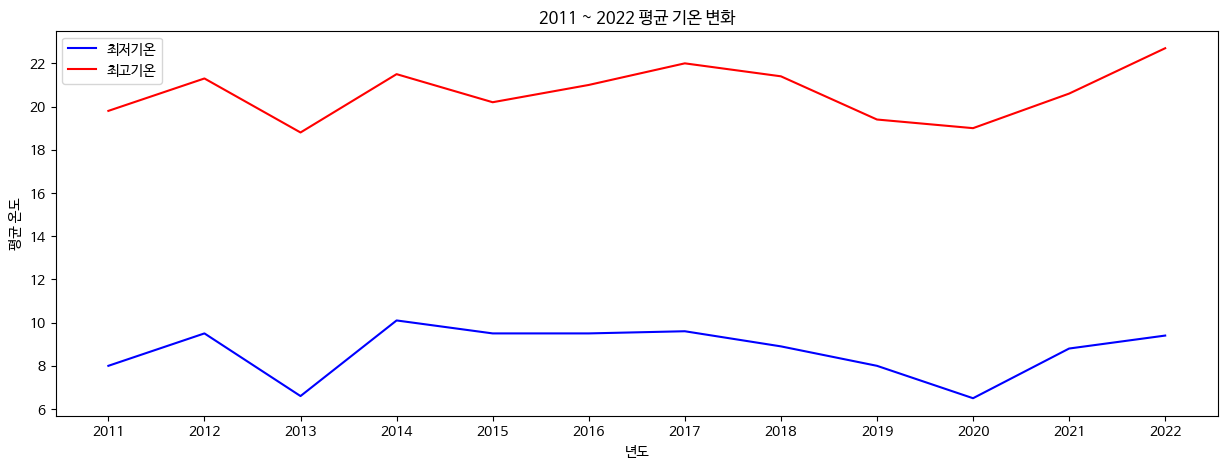

In [ ]:
main()